In [97]:
#import the given data from my personal open Github
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/WeixuanX/bioinformatics/main/puffins.csv")
data

,species,bill_length_mm,bill_depth_mm,wing_length_cm,body_mass_kg,sex,measurement_year
0,atlantic,38.4,19.9,20.7,3.9,Male,2009
1,atlantic,40.9,17.2,20.1,3.3,Female,2009
2,atlantic,41.5,17.5,20.3,3.3,Female,2007
3,atlantic,44.0,17.8,20.4,4.2,Male,2009
4,atlantic,37.3,16.7,19.4,3.2,Female,2009
...,...,...,...,...,...,...,...
339,tufted,52.4,17.4,20.4,3.8,Female,2009
340,tufted,54.3,19.2,20.5,3.8,Male,2007
341,tufted,48.3,16.1,20.0,2.8,Female,2008
342,tufted,50.0,17.0,19.9,3.5,Male,2007


In [98]:
#Represent the species atlantic by 0; Represent species horned by 1; Represent species tufted with 2
#Use 0 for male, use 1 for female
#Remove rows containing missing values
import pandas as pd
import numpy as np
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
label.fit(np.unique(list(data['species'].values)))
data['species'] = label.transform(list(data['species'].values))
sex_mapping = {"Male":0, "Female":1}
data["sex"] = data["sex"].map(sex_mapping)
data = data.dropna(axis=0, how='any')
data

,species,bill_length_mm,bill_depth_mm,wing_length_cm,body_mass_kg,sex,measurement_year
0,0,38.4,19.9,20.7,3.9,0.0,2009
1,0,40.9,17.2,20.1,3.3,1.0,2009
2,0,41.5,17.5,20.3,3.3,1.0,2007
3,0,44.0,17.8,20.4,4.2,0.0,2009
4,0,37.3,16.7,19.4,3.2,1.0,2009
...,...,...,...,...,...,...,...
339,2,52.4,17.4,20.4,3.8,1.0,2009
340,2,54.3,19.2,20.5,3.8,0.0,2007
341,2,48.3,16.1,20.0,2.8,1.0,2008
342,2,50.0,17.0,19.9,3.5,0.0,2007


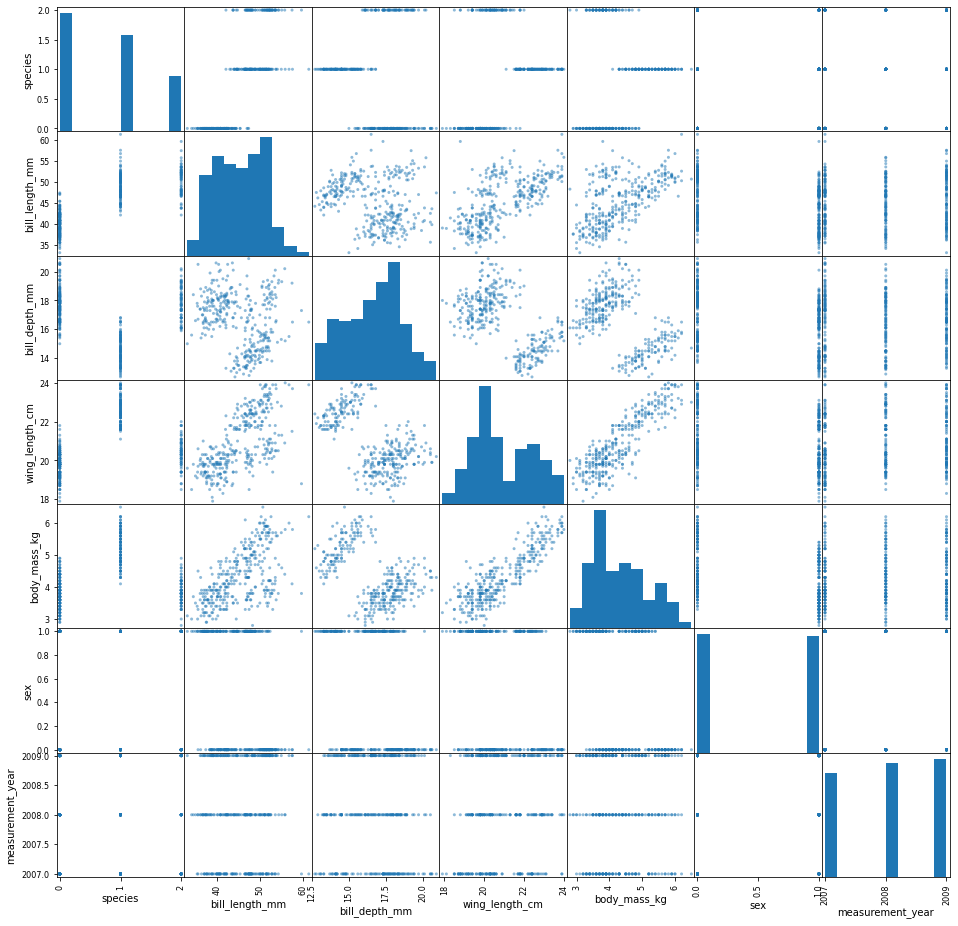

In [99]:
#Check correlations between species features and select 2 species that are correlated
from pandas.plotting import scatter_matrix
a = scatter_matrix(data, figsize=(16, 16))

In [175]:
#grab 2 of the features to visualise the result
data_subset= data[["body_mass_kg","wing_length_cm"]]

TypeError: unhashable type: 'list'

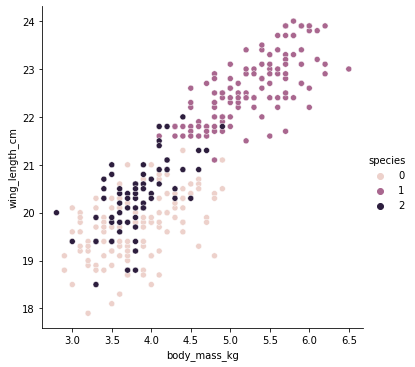

In [101]:
import seaborn as sns
import pandas as pd

sns.relplot(data=data, x="body_mass_kg",y="wing_length_cm", hue = "species")

In [109]:
from sklearn.model_selection import train_test_split

train_X_s, test_X_s, train_y_s, test_y_s = train_test_split(X,y, random_state=42)

In [137]:
from sklearn.neighbors import KNeighborsClassifier

direct_knn = KNeighborsClassifier()
direct_knn.fit(train_X_s, train_y_s)
direct_knn.score(test_X_s, test_y_s)

0.7111111111111111

In [140]:
import seaborn as sns

    
sns.plot_knn(direct_knn, X_subset, y)

AttributeError: module 'seaborn' has no attribute 'plot_knn'

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
X_scaled_raw = scaler.transform(data)
X_scaled = pd.DataFrame(X_scaled_raw, columns=data.columns)
X_scaled

,species,bill_length_mm,bill_depth_mm,wing_length_cm,body_mass_kg,sex,measurement_year
0,-0.998826,-1.229525,1.707191,-0.140234,-0.524235,-0.991031,1.180155
1,-0.998826,-0.785070,0.289368,-0.551668,-1.246594,1.009050,1.180155
2,-0.998826,-0.678401,0.446904,-0.414523,-1.246594,1.009050,-1.283742
3,-0.998826,-0.233946,0.604440,-0.345951,-0.163055,-0.991031,1.180155
4,-0.998826,-1.425086,0.026808,-1.031675,-1.366987,1.009050,1.180155
...,...,...,...,...,...,...,...
328,1.609872,1.259423,0.394392,-0.345951,-0.644628,1.009050,1.180155
329,1.609872,1.597209,1.339607,-0.277378,-0.644628,-0.991031,-1.283742
330,1.609872,0.530516,-0.288264,-0.620240,-1.848560,1.009050,-0.051794
331,1.609872,0.832746,0.184344,-0.688813,-1.005808,-0.991031,-1.283742


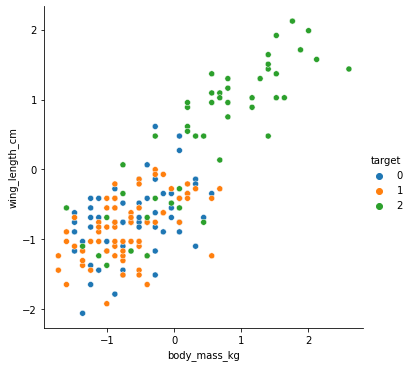

In [124]:
sns.relplot(data=X_scaled, x="body_mass_kg",y="wing_length_cm", hue = y)

In [125]:
from sklearn.pipeline import make_pipeline

scaled_knn = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [135]:
scaled_knn.fit(train_X_s, train_y_s)
scaled_knn.score(test_X_s, test_y_s)

0.9555555555555556

In [ ]:
from plot import plot_knn
    
plot_knn(scaled_knn, X_subset, y)

In [134]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

plot_knn(scaled_knn, data_subset, y)

NameError: name 'plot_knn' is not defined

In [ ]:
#Principal component analysis

In [154]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)  # re-split using all columns

In [155]:
scaled_knn_all = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)
scaled_knn_all.fit(train_X, train_y)
scaled_knn_all.score(test_X, test_y)

0.92

In [159]:
from sklearn.decomposition import PCA

scaled_pca_knn = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),  # PCA with 2 components
    KNeighborsClassifier()
)
scaled_pca_knn.fit(train_X, train_y)
scaled_pca_knn.score(test_X, test_y)

0.92

In [160]:
transformer_steps = scaled_pca_knn[:-1]  # all except the last step
knn_step = scaled_pca_knn[-1]  # only the last step

In [168]:
transformed_X = transformer_steps.transform(X)
from plot import plot_knn
plot_knn(knn_step, transformed_X, y)

ValueError: X has 4 features, but StandardScaler is expecting 2 features as input.

In [ ]:
#visualisation the result 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()  # 加载数据
X = iris.data[:, (1, 3)]  # 为方便画图，仅采用数据的其中两个特征
y = iris.target